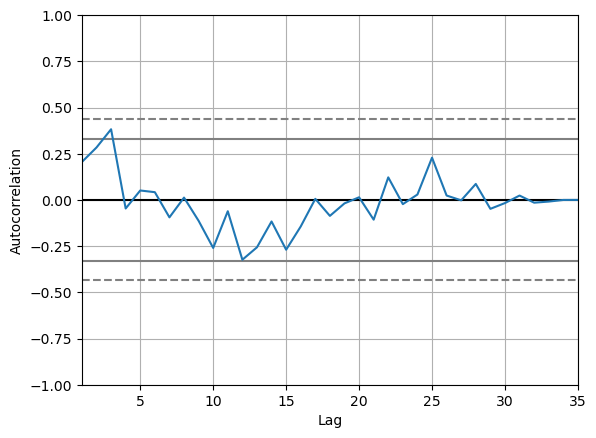

In [97]:

     

#import pandas as pd
#series = pd.read_csv('C:\\Dados3.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

import pandas as pd
#series = pd.read_csv('C:\\Dados3.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = pd.read_excel('c:\\Dados.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True,skiprows =[5,33,34,12,13,18,19,20,26,27,40])
     

# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")
     

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
     

# autocorrelation plot 
autocorrelation_plot(series)
pyplot.show()
     



ValueError: could not broadcast input array from shape (35,) into shape (41,)

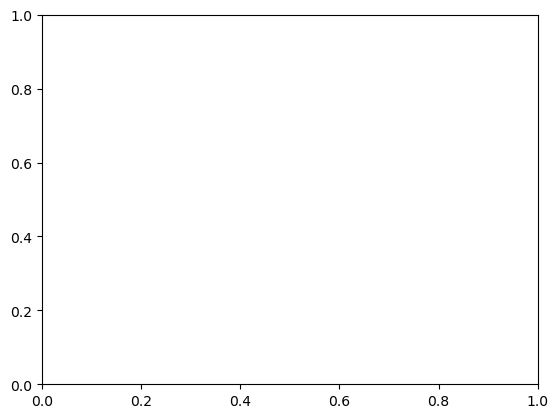

In [98]:


import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
     

plot_acf(series, lags=40)
pyplot.show()
     


In [99]:


# fit model
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
     

# ARIMA(p,d,q)
model = ARIMA(series, order=(7,1,1))
     


In [100]:


model_fit = model.fit()
     

# summary 
print(model_fit.summary())
     


                               SARIMAX Results                                
Dep. Variable:                 Vendas   No. Observations:                   35
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -240.910
Date:                Fri, 03 Feb 2023   AIC                            499.821
Time:                        23:30:57   BIC                            513.558
Sample:                             0   HQIC                           504.505
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8060      1.297     -0.622      0.534      -3.348       1.736
ar.L2         -0.4232      1.020     -0.415      0.678      -2.422       1.576
ar.L3          0.0306      0.605      0.051      0.9

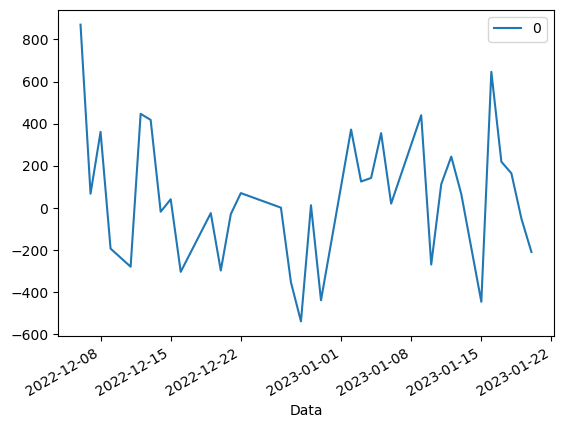

In [101]:


# plot residuais
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
     

residuals.plot()
pyplot.show()
     


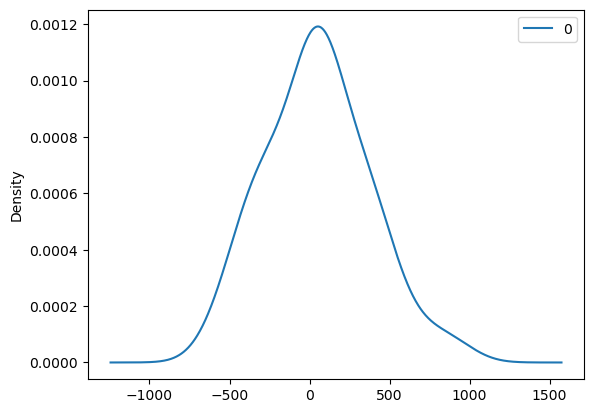

In [102]:


# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()
     


In [103]:


# estatística descritiva dos residuos
print(residuals.describe())
     


                0
count   35.000000
mean    49.795239
std    319.529811
min   -538.822741
25%   -201.447156
50%     41.008562
75%    231.418192
max    870.000000


In [123]:


# a variável X recebe os dados da série
X = series.values
X = X.astype('float32')
     


# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)
     

# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]
     

# cria a variável history
history = [x for x in train]
     

# cria lista de previsões
predictions = list()
     

# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]
     

#from statsmodels.tsa.arima.model import ARIMA

from matplotlib import pyplot
     


In [124]:
# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  import statsmodels.api as sm
  # cria um modelo ARIMA com os dados de history
  model = sm.tsa.arima.ARIMA(diff, order=(1,0,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit()
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
      
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=1291.274, Valor esperado=638
Valor predito=961.938, Valor esperado=106
Valor predito=225.719, Valor esperado=814
Valor predito=1136.257, Valor esperado=679
Valor predito=466.205, Valor esperado=712
Valor predito=721.955, Valor esperado=1229
Valor predito=530.806, Valor esperado=821
Valor predito=621.741, Valor esperado=1317
Valor predito=1173.322, Valor esperado=807
Valor predito=667.344, Valor esperado=923
Valor predito=499.809, Valor esperado=1265
Valor predito=673.336, Valor esperado=892
Valor predito=886.880, Valor esperado=566
Valor predito=99.274, Valor esperado=1692
Valor predito=1449.957, Valor esperado=1097
Valor predito=1066.198, Valor esperado=1302
Valor predito=1142.268, Valor esperado=1405
Valor predito=1697.052, Valor esperado=945


Test RMSE: 618.559


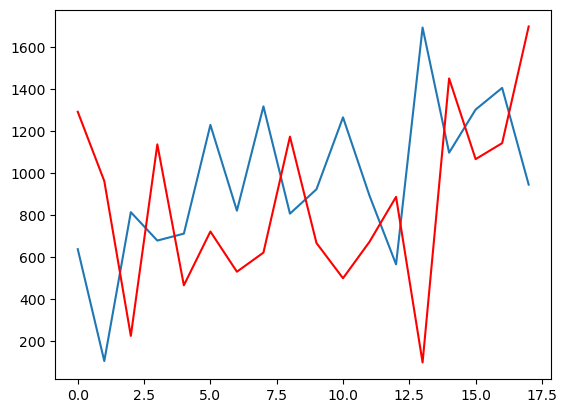

In [125]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
     


# plot forecasts against actual outcomes 
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
     


In [126]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [127]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [128]:


# imprime as 5 primeiras linhas
residuals.head()
     


,0
0,-653.274449
1,-855.937846
2,588.280922
3,-457.257398
4,245.794547


In [129]:
# estatística descritiva
residuals.describe()

,0
count,18.000000
mean,105.481345
std,627.169399
min,-855.937846
25%,-362.980876
50%,240.798180
75%,452.832067
max,1592.726114


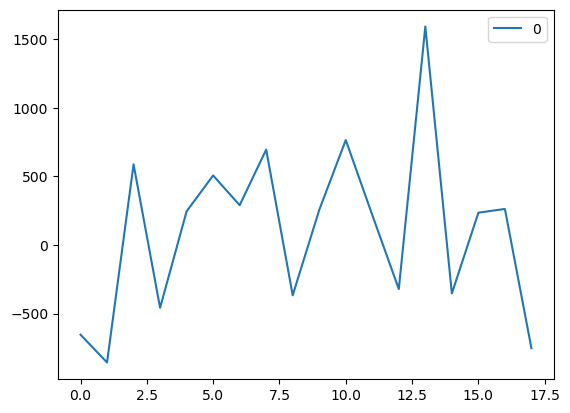

In [130]:
# plot residuals
residuals.plot()
pyplot.show()

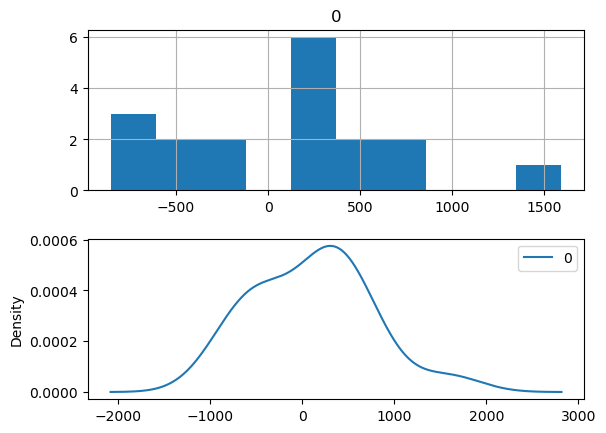

In [131]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 13 must be < 9.

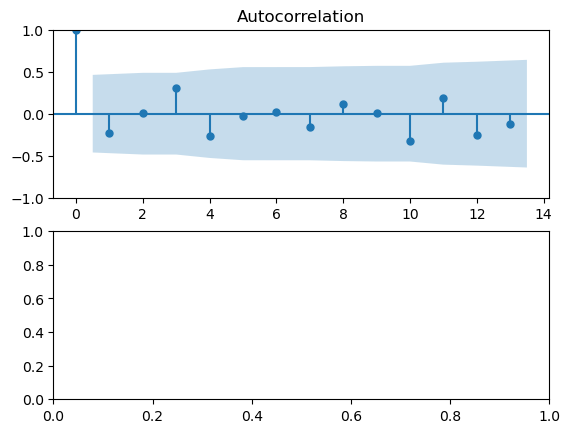

In [132]:


# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
     

# plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()
     
